In [43]:
! pip show tiktoken openai pandas matplotlib plotly scikit-learn numpy

Name: tiktoken
Version: 0.9.0
Summary: tiktoken is a fast BPE tokeniser for use with OpenAI's models
Home-page: https://github.com/openai/tiktoken
Author: Shantanu Jain
Author-email: shantanu@openai.com
License: MIT License

Copyright (c) 2022 OpenAI, Shantanu Jain

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULA

In [45]:
import pandas as pd 
import tiktoken

input_dspath = 'data/netflix_fb_comments2k.csv'
df = pd.read_csv(input_dspath, index_col=0)
df = df [["UserName", "Comment", "Timestamp"]]
df = df.dropna()

df ['combined'] = ( "UserName: " + df.UserName.str.strip() + "; Comment: " + df.Comment.str.strip())

df.head(2)

,UserName,Comment,Timestamp,combined
PostID,,,,
74711,Raymond Stewart,Why isn't everyone talking about Daybreak? it ...,2021-08-26 14:03:32,UserName: Raymond Stewart; Comment: Why isn't ...
47187,Nichole Bradley,The CGI in Tiny Pretty Things is groundbreakin...,2021-03-26 23:20:31,UserName: Nichole Bradley; Comment: The CGI in...


In [46]:
df["combined"]  

PostID
74711     UserName: Raymond Stewart; Comment: Why isn't ...
47187     UserName: Nichole Bradley; Comment: The CGI in...
76102     UserName: Jamie Shields; Comment: The characte...
106953    UserName: Summer Mahoney; Comment: I wish the ...
50247     UserName: Barbara Webb; Comment: Netflix reall...
                                ...                        
101980    UserName: Gwendolyn Lopez; Comment: The soundt...
102788    UserName: Ashley Ferguson; Comment: The cinema...
5584      UserName: Autumn Burton; Comment: How can Netf...
6459      UserName: Andrew Lang; Comment: Netflix really...
114138    UserName: Monica Tate; Comment: The chemistry ...
Name: combined, Length: 1999, dtype: object

In [47]:
embedding_model = "text-embedding-3-small"
embedding_encoding = "cl100k_base"
max_tokens = 8190

top_1k = 1000
df = df.sort_values("Timestamp", ascending=False).head(top_1k * 2 - 500)

# 删除timestamp列
df.drop("Timestamp", axis=1, inplace=True)

encoding = tiktoken.get_encoding(embedding_encoding)

df["tokens_n"] = df.combined.apply(lambda x: len(encoding.encode(x)))

df = df[df.tokens_n < max_tokens].head(top_1k)

len(df)

1000

In [48]:
from openai import OpenAI
import os

apiKey = os.getenv("OPENAI_API_KEY")
baseUrl = "https://api.openai-proxy.com/v1"

client = OpenAI(
    api_key=apiKey,
    base_url=baseUrl
)

# try embedding
oneRes = client.embeddings.create(input="哈哈哈", model=embedding_model)
print(oneRes)

CreateEmbeddingResponse(data=[Embedding(embedding=[0.013387012295424938, -0.021063100546598434, -0.015406464226543903, 0.06648991256952286, -0.00021256496256683022, -0.05789095535874367, -0.024646000936627388, 0.032940953969955444, -0.02199682593345642, -0.047381121665239334, -0.026708880439400673, 0.03947702795267105, -0.05128973722457886, -0.040975332260131836, -0.03331010043621063, 0.012464144267141819, -0.0789540559053421, -0.026209447532892227, -0.01739334501326084, 0.07343856245279312, 0.006438360549509525, 0.03526441007852554, 0.035655271261930466, 0.002790318103507161, -0.009288392961025238, 0.04646911099553108, -0.016948197036981583, -0.0018185925437137485, 0.030747784301638603, -0.018261926248669624, 0.015384749509394169, -0.03172494098544121, 0.016340188682079315, -0.02275683544576168, 0.003536755219101906, 0.020585382357239723, -0.018620215356349945, -0.007871519774198532, 0.003357610432431102, 0.003547612577676773, -0.006215786561369896, -0.003797329729422927, 0.0093535371

In [49]:
def embedding_text(text, model="text-embedding-3-small"):
    return client.embeddings.create(input=text, model=model).data[0].embedding

In [17]:
df["embedding"] = df.combined.apply(embedding_text)
output_path="data/netflix_fb_comments2k_embedded.csv"
df.to_csv(output_path)

In [50]:
embedded_dspath="data/netflix_fb_comments2k_embedded.csv"
df_embedded = pd.read_csv(embedded_dspath)
df_embedded["embedding"]

0      [0.01826365478336811, 0.05402630195021629, -0....
1      [0.007734737358987331, 0.034567590802907944, -...
2      [0.011811982840299606, 0.031605903059244156, -...
3      [-0.03342729061841965, -0.013053910806775093, ...
4      [0.01549462042748928, -0.011028608307242393, -...
                             ...                        
995    [-0.006067908369004726, 0.012817103415727615, ...
996    [-0.005795624572783709, -0.004070696420967579,...
997    [-0.0005066532175987959, 0.018647653982043266,...
998    [-0.005812500137835741, 0.03914811834692955, -...
999    [-0.00618882616981864, 0.02900594472885132, -0...
Name: embedding, Length: 1000, dtype: object

In [51]:
len(df_embedded["embedding"][0])

34154

In [52]:
type(df_embedded["embedding"][0])

str

In [53]:
import ast

df_embedded["embedding_vec"] = df_embedded["embedding"].apply(ast.literal_eval)

len(df_embedded["embedding_vec"][0])

1536

In [54]:
df_embedded.head(3)

,PostID,UserName,Comment,combined,tokens_n,embedding,embedding_vec
0,68357,Hannah Mayer,The Punisher feels like a breath of fresh air....,UserName: Hannah Mayer; Comment: The Punisher ...,21,"[0.01826365478336811, 0.05402630195021629, -0....","[0.01826365478336811, 0.05402630195021629, -0...."
1,5449,Shane Johnson,"The latest season of The Eddy is It was okay, ...",UserName: Shane Johnson; Comment: The latest s...,24,"[0.007734737358987331, 0.034567590802907944, -...","[0.007734737358987331, 0.034567590802907944, -..."
2,6109,Mark Dunn,I’ve never seen anything like The OA. it break...,UserName: Mark Dunn; Comment: I’ve never seen ...,20,"[0.011811982840299606, 0.031605903059244156, -...","[0.011811982840299606, 0.031605903059244156, -..."


In [55]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib 

from sklearn.manifold import TSNE

assert len(df_embedded["embedding_vec"].apply(len).unique()) == 1
matrix = np.vstack(df_embedded["embedding_vec"].values)

matrix


array([[ 0.01826365,  0.0540263 , -0.02693962, ..., -0.008176  ,
        -0.04405629, -0.01769016],
       [ 0.00773474,  0.03456759, -0.08059406, ..., -0.03173016,
         0.00109217, -0.01074269],
       [ 0.01181198,  0.0316059 , -0.0329094 , ..., -0.00565656,
        -0.00427661, -0.04081088],
       ...,
       [-0.00050665,  0.01864765, -0.04416327, ..., -0.02692299,
        -0.00748017, -0.00698759],
       [-0.0058125 ,  0.03914812, -0.04684504, ...,  0.0051722 ,
         0.04522603,  0.00128393],
       [-0.00618883,  0.02900594, -0.01847291, ...,  0.01972939,
         0.00327654,  0.00474187]])

In [56]:
import numpy as np
# 从 scikit-learn中导入 KMeans 类。KMeans 是一个实现 K-Means 聚类算法的类。
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# np.vstack 是一个将输入数据堆叠到一个数组的函数（在垂直方向）。
# 这里它用于将所有的 ada_embedding 值堆叠成一个矩阵。
# matrix = np.vstack(df.ada_embedding.values)

# 定义要生成的聚类数。
n_clusters = 4

# 创建一个 KMeans 对象，用于进行 K-Means 聚类。
# n_clusters 参数指定了要创建的聚类的数量；
# init 参数指定了初始化方法（在这种情况下是 'k-means++'）；
# random_state 参数为随机数生成器设定了种子值，用于生成初始聚类中心。
# n_init=10 消除警告 'FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4'
kmeans = KMeans(n_clusters = n_clusters, init='k-means++', random_state=42, n_init=10)

# 使用 matrix（我们之前创建的矩阵）来训练 KMeans 模型。这将执行 K-Means 聚类算法。
kmeans.fit(matrix)

# kmeans.labels_ 属性包含每个输入数据点所属的聚类的索引。
# 这里，我们创建一个新的 'Cluster' 列，在这个列中，每个数据点都被赋予其所属的聚类的标签。
df_embedded['Cluster'] = kmeans.labels_

In [57]:
df_embedded['Cluster']


0      0
1      0
2      0
3      3
4      2
      ..
995    3
996    3
997    3
998    3
999    0
Name: Cluster, Length: 1000, dtype: int32

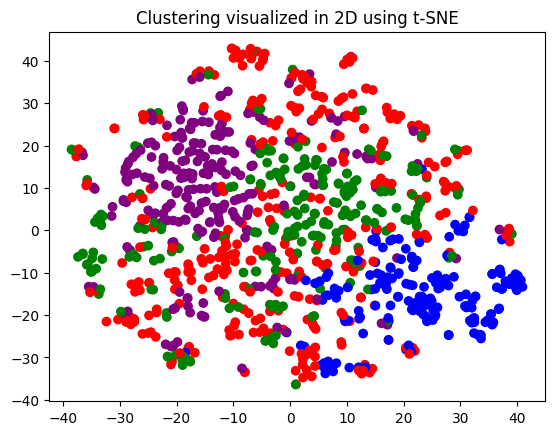

In [58]:
# 首先为每个聚类定义一个颜色。
colors = ["red", "green", "blue", "purple"]

# 然后，你可以使用 t-SNE 来降维数据。这里，我们只考虑 'embedding_vec' 列。
tsne_model = TSNE(n_components=2, random_state=42)
vis_data = tsne_model.fit_transform(matrix)

# 现在，你可以从降维后的数据中获取 x 和 y 坐标。
# 所有行的第一个元素
x = vis_data[:, 0]
# 所有行的第二个元素
y = vis_data[:, 1]

# 'Cluster' 列中的值将被用作颜色索引。
color_indices = df_embedded['Cluster'].values

# 创建一个基于预定义颜色的颜色映射对象
colormap = matplotlib.colors.ListedColormap(colors)

# 使用 matplotlib 创建散点图，其中颜色由颜色映射对象和颜色索引共同决定
plt.scatter(x, y, c=color_indices, cmap=colormap)

# 为图形添加标题
plt.title("Clustering visualized in 2D using t-SNE")

# 显示图形
plt.show()

In [59]:
def similarity(a, b):
    return np.dot(a,b)/(np.linalg.norm(a) * np.linalg.norm(b))

In [62]:
def search_reviews(df, comment, n=4, pprint=True):
    comment_embedding = embedding_text(comment)

    df["similarity"] = df.embedding_vec.apply(lambda x: similarity(x, comment_embedding))

    res = df.sort_values("similarity", ascending=False)['combined'].head(n)

    # 移除notebook输出长度限制
    if pprint:
        for r in res:
            print(r)
            print()

    return res


In [72]:
search_reviews(df_embedded, "best on netflix")

UserName: Duane Smith MD; Comment: Hollywood is the best thing I’ve seen on Netflix in a while. it's unlike anything else on Netflix

UserName: Kristie Roberts; Comment: Just subscribed to Netflix. Any recommendations like Unbelievable?

UserName: Eric Porter; Comment: Blood & Water is hands down the best Netflix series. It's so relatable.

UserName: Timothy Gordon; Comment: Netflix's original content like Raising Dion is better than most network shows. The production values are impressive.



605    UserName: Duane Smith MD; Comment: Hollywood i...
894    UserName: Kristie Roberts; Comment: Just subsc...
460    UserName: Eric Porter; Comment: Blood & Water ...
750    UserName: Timothy Gordon; Comment: Netflix's o...
Name: combined, dtype: object